# Milestone Report - NHL Sentiment Analysis
The NHL sentiment analysis will rank teams based on the positivity of the tweets by each team, tweets by bloggers/writers of the teams, tweets using specific team hashtags, and replies to team accounts. The tweets were collected from January 20th, 2018 until the All-Star break, which was January 25th, 2018. 
<br>
<br>
The purpose of this document is describe how the data was gathered and cleaned. The description of the initial exploratory analysis is also included.

# Data Collection
The tweets for each NHL team were collected using Tweepy's streaming API. The API allows for key phrases or hashtags to be followed (like #nyr for the New York Rangers) and for accounts to be followed (like @NYRangers). Twitter handles of the teams and writers/bloggers were followed and team hashtags were tracked. In addition to this, the language can be specified and this was set to English.
<br>
<br>
The stream was run for on a mostly continuous basis for the 6 days that it ran. There were a few breaks in the collection due to errors in the streaming code. The tweets were returned in JSON format.

# Data Cleaning

Twitter provides all of their tweets in the JSON file format. The first step was to try to normalize the data. However, not every name/value pair exists for each tweet that is collected (example, not every tweet has a quoted tweet, therefore the quoted tweet name/value pairs do not exist for those tweets). Instead of normalizing, each name/value pair was put into a dataframe, which consisted of 340+ columns and 425k tweets, with a lot of rows containing NaN values. The data included columns for hashtags and mentions for tweets, retweets, quoted tweets, and retweeted quoted tweets. It also had columns for replies and two text columns (short and extended) for each of the four kinds of tweets.
<br>
<br>
Once all of the data was loaded into a dataframe, hashtag and mentions columns had to be cleaned as they contained embedded JSON. Each column was cleaned up to contain a list of each hashtag and mention from the tweet, which was done for determining the team(s) associated to the tweet. After this was done, most columns were removed from the dataset except the date, all text columns, all reply columns, all mentions columns, and all hashtag columns (about 30 columns in total).
<br>
<br>
The next step of the cleaning process was to determine the team(s) associated to each row of the dataframe. Using the hashtags, mentions, and reply columns, I was able to generate a list teams associated to each tweet based on the hashtags tracked and accounts followed for each NHL team. Once this was done, the reply, mentions, and hashtag columns were removed from the dataset.
<br>
<br>
After generating a column for the teams, the next thing to do was to reduce the text columns to one column. Each tweet contained a short version of a tweet (140 characters) and an extended version (280 characters). These were combined by looking at whether both text columns contained text and if so, the extended text was used. If not, then the shortened version was kept because the tweet was less than 140 characters. This was done for all of the types of tweets and the number of text columns was reduced to 4, from 8.
<br>
<br>
These 4 columns of text still contained duplicate text, like tweets and retweets and quoted tweets and retweeted quoted tweets. To reduce the duplication, the tweets and retweets were reduced by using the retweet text if both had text and using the tweet text if only the tweet had text. The same process was done for the quoted tweet and the retweeted quoted tweet. The remaining columns were removed which left 2 text columns. The quoted tweets were then added to the tweets column, which added another 40k tweets. 

## Cleaning Text Data
The next phase of the cleanup involved removing tweets that were irrelevant, correcting spelling errors, and spelling out acronyms. To clean out irrelevant tweets, I scanned the document looking for hashtags that did not reference hockey teams and tweets about politics. These tweets, which amounted to about 25k tweets, were removed from the dataset.
<br>
<br>
Using a list of common acronyms in social media (lol, jk, etc.) and hockey (pp, ppg, etc.), each row of the dataset was cleaned up. In addition to cleaning up the acronyms, URLs were removed from the tweets so that the URLs would not cause issues with the sentiment analysis. The next step was to build a program to find potential misspellings. In order to do this, the text was put in a separate dataframe where hashtags, mentions (@), emojis, and URLs were removed. The text was then put through a spell check function in python, which returned 29k possible spelling errors. Using this 29k potential errors, I corrected about 60 errors, with more spelling fixes to come. 


# Exploratory Analysis
The initial exploratory analysis breaks down the total number of tweets per team, the number of tweets by hour for the NHL and each team (not all were included in this report as the file became too large), the most frequent words and bigrams for the NHL, and word clouds for each team (not all were included in this report as the file became too large). 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import nltk
from nltk import FreqDist
from wordcloud import WordCloud

In [2]:
col_dict = {"team": lambda x: x.strip("[]").replace('\'', '').split(", ")}
hockey = pd.read_csv('/Users/matthewcassi/Documents/nhl_sentiment/team_dfs/no_stops.csv', converters=col_dict)
hockey = hockey.dropna()

def bool_team(row, team):
    team_bool = team in row['team']
    return team_bool

teams = hockey[['team']]

In [3]:
nyr = teams.apply(bool_team, team='nyr', axis=1)
ducks = teams.apply(bool_team, team='ducks', axis=1)
yotes = teams.apply(bool_team, team='yotes', axis=1)
bruins = teams.apply(bool_team, team='bruins', axis=1)
sabres = teams.apply(bool_team, team='sabres', axis=1)
flames = teams.apply(bool_team, team='flames', axis=1)
canes = teams.apply(bool_team, team='canes', axis=1)
hawks = teams.apply(bool_team, team='hawks', axis=1)
avs = teams.apply(bool_team, team='avs', axis=1)
jackets = teams.apply(bool_team, team='jackets', axis=1)
stars = teams.apply(bool_team, team='stars', axis=1)
wings = teams.apply(bool_team, team='wings', axis=1)
oilers = teams.apply(bool_team, team='oilers', axis=1)
panthers = teams.apply(bool_team, team='panthers', axis=1)
kings = teams.apply(bool_team, team='kings', axis=1)
wild = teams.apply(bool_team, team='wild', axis=1)
habs = teams.apply(bool_team, team='habs', axis=1)
preds = teams.apply(bool_team, team='preds', axis=1)
devils = teams.apply(bool_team, team='devils', axis=1)
isles = teams.apply(bool_team, team='isles', axis=1)
sens = teams.apply(bool_team, team='sens', axis=1)
flyers = teams.apply(bool_team, team='flyers', axis=1)
pens = teams.apply(bool_team, team='pens', axis=1)
sharks = teams.apply(bool_team, team='sharks', axis=1)
blues = teams.apply(bool_team, team='blues', axis=1)
bolts = teams.apply(bool_team, team='bolts', axis=1)
leafs = teams.apply(bool_team, team='leafs', axis=1)
canucks = teams.apply(bool_team, team='canucks', axis=1)
knights = teams.apply(bool_team, team='knights', axis=1)
caps = teams.apply(bool_team, team='caps', axis=1)
jets = teams.apply(bool_team, team='jets', axis=1)

In [4]:
nyr_df = hockey[nyr].reset_index().drop(['index','team'], 1)
ducks_df = hockey[ducks].reset_index().drop(['index','team'], 1)
yotes_df = hockey[yotes].reset_index().drop(['index','team'], 1)
bruins_df = hockey[bruins].reset_index().drop(['index','team'], 1)
sabres_df = hockey[sabres].reset_index().drop(['index','team'], 1)
flames_df = hockey[flames].reset_index().drop(['index','team'], 1)
canes_df = hockey[canes].reset_index().drop(['index','team'], 1)
hawks_df = hockey[hawks].reset_index().drop(['index','team'], 1)
avs_df = hockey[avs].reset_index().drop(['index','team'], 1)
jackets_df = hockey[jackets].reset_index().drop(['index','team'], 1)
stars_df = hockey[stars].reset_index().drop(['index','team'], 1)
wings_df = hockey[wings].reset_index().drop(['index','team'], 1)
oilers_df = hockey[oilers].reset_index().drop(['index','team'], 1)
panthers_df = hockey[panthers].reset_index().drop(['index','team'], 1)
kings_df = hockey[kings].reset_index().drop(['index','team'], 1)
wild_df = hockey[wild].reset_index().drop(['index','team'], 1)
habs_df = hockey[habs].reset_index().drop(['index','team'], 1)
preds_df = hockey[preds].reset_index().drop(['index','team'], 1)
devils_df = hockey[devils].reset_index().drop(['index','team'], 1)
isles_df = hockey[isles].reset_index().drop(['index','team'], 1)
sens_df = hockey[sens].reset_index().drop(['index','team'], 1)
flyers_df = hockey[flyers].reset_index().drop(['index','team'], 1)
pens_df = hockey[pens].reset_index().drop(['index','team'], 1)
sharks_df = hockey[sharks].reset_index().drop(['index','team'], 1)
blues_df = hockey[blues].reset_index().drop(['index','team'], 1)
bolts_df = hockey[bolts].reset_index().drop(['index','team'], 1)
leafs_df = hockey[leafs].reset_index().drop(['index','team'], 1)
canucks_df = hockey[canucks].reset_index().drop(['index','team'], 1)
knights_df = hockey[knights].reset_index().drop(['index','team'], 1)
caps_df = hockey[caps].reset_index().drop(['index','team'], 1)
jets_df = hockey[jets].reset_index().drop(['index','team'], 1)

In [5]:
nyr_len = len(nyr_df)
ducks_len = len(ducks_df)
yotes_len = len(yotes_df)
bruins_len = len(bruins_df)
sabres_len = len(sabres_df)
flames_len = len(flames_df)
canes_len = len(canes_df)
hawks_len = len(hawks_df)
avs_len = len(avs_df)
jackets_len = len(jackets_df)
stars_len = len(stars_df)
wings_len = len(wings_df)
oilers_len = len(oilers_df)
panthers_len = len(panthers_df)
kings_len = len(kings_df)
wild_len = len(wild_df)
habs_len = len(habs_df)
preds_len = len(preds_df)
devils_len = len(devils_df)
isles_len = len(isles_df)
sens_len = len(sens_df)
flyers_len = len(flyers_df)
pens_len = len(pens_df)
sharks_len = len(sharks_df)
blues_len = len(blues_df)
bolts_len = len(bolts_df)
leafs_len = len(leafs_df)
canucks_len = len(canucks_df)
knights_len = len(knights_df)
caps_len = len(caps_df)
jets_len = len(jets_df)

# Tweets Per Team

The following bar plot shows the number of tweets collected per team after all of the data cleaning. The Chicago Blackhawks had the most tweets out of all of the teams and the Panthers had the fewest. The biggest surprise is the Golden Knights as this season is their first season in the NHL.

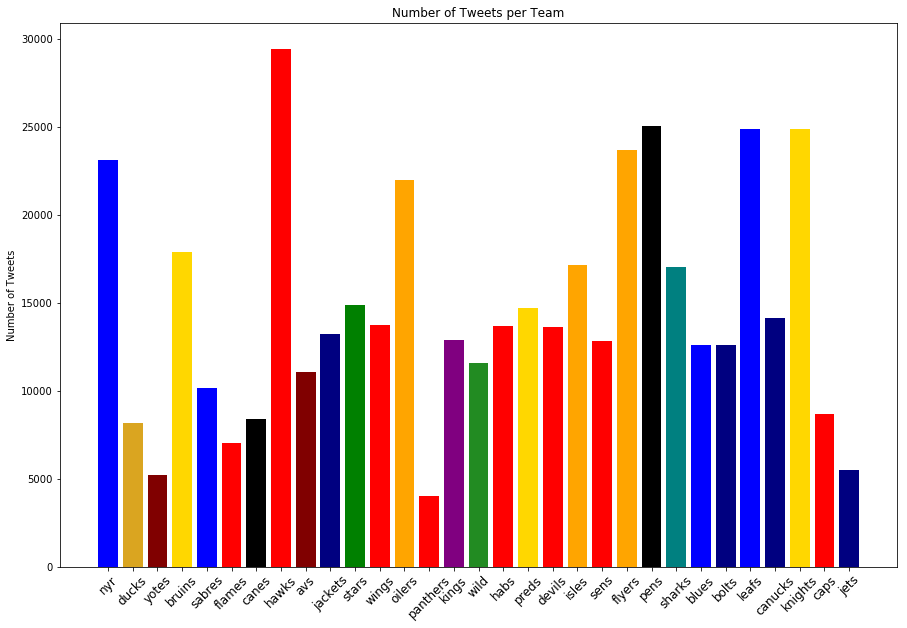

In [24]:
teams = np.array(['nyr','ducks','yotes','bruins','sabres','flames','canes','hawks','avs','jackets','stars','wings','oilers','panthers','kings','wild','habs','preds','devils','isles','sens','flyers','pens','sharks','blues','bolts','leafs','canucks','knights','caps','jets'])

length = np.array([nyr_len,ducks_len,yotes_len,bruins_len,sabres_len,flames_len,canes_len,hawks_len,avs_len,jackets_len,stars_len,wings_len,oilers_len,panthers_len,kings_len,wild_len,habs_len,preds_len,devils_len,isles_len,sens_len,flyers_len,pens_len,sharks_len,blues_len,bolts_len,leafs_len,canucks_len,knights_len,caps_len,jets_len])

team_tuple = tuple(teams)
cols = ['blue','goldenrod','maroon','gold','blue','red','red','red','maroon','navy','green','red','orange','red','purple','forestgreen','red','gold','red','orange','red','orange','black','teal','blue','navy','blue','navy','gold','red','navy']

plt.figure(figsize=(15,10))
plt.bar(np.arange(len(length)), length, color=cols)
plt.xticks(np.arange(len(team_tuple)), team_tuple, rotation=45, size='large')
plt.ylabel('Number of Tweets')
plt.title('Number of Tweets per Team')
plt.show()

# Tweets by Hour of Day for the NHL

The bar plot below shows the most popular tweet times (24 hour clock) for the entire NHL. The most popular times were around 5PM through 4AM, which coincides with pregames, the actual games, and post-games.

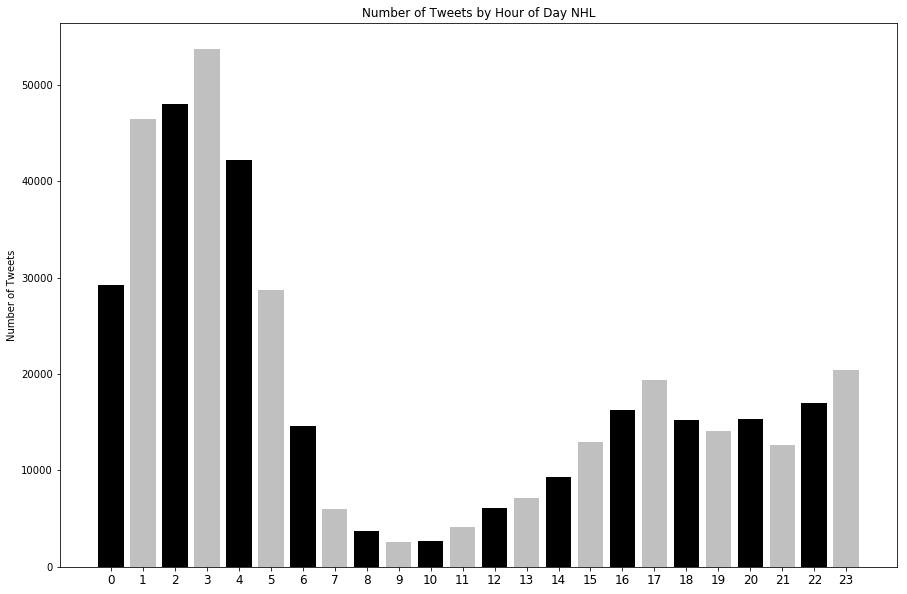

In [7]:
times = hockey.groupby('hour')['stop_text'].count()
plt.figure(figsize=(15,10))
plt.bar(np.arange(24), times, color=['black','silver'])
plt.xticks(np.arange(24),size='large')
plt.ylabel('Number of Tweets')
plt.title('Number of Tweets by Hour of Day NHL')
plt.show()

## Tweets by Hour of Day - Metropolitan and Central Divisions

The following charts show the tweets by hour of the day for the 8 teams in the Metropolitan Division and the 7 teams in the Central Division. Most tweets are during games and after games end. The New York Rangers, although on the east coast, played on the west coast during this stretch and therefore most tweets happened after midnight.

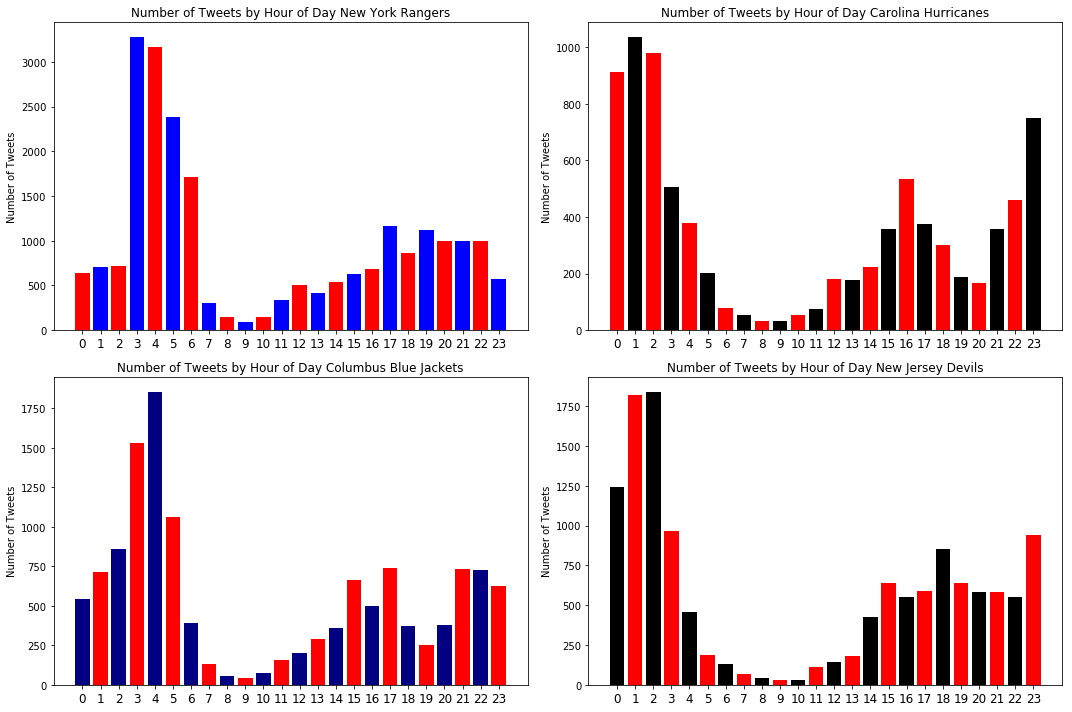

In [8]:
times_nyr = nyr_df.groupby('hour')['stop_text'].count()

nyr_col = 'rb'
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
plt.bar(np.arange(24), times_nyr, color=nyr_col)
plt.xticks(np.arange(24),size='large')
plt.ylabel('Number of Tweets')
plt.title('Number of Tweets by Hour of Day New York Rangers')

canes_col = ['red', 'black']
times_canes = canes_df.groupby('hour')['stop_text'].count()
plt.subplot(2,2,2)
plt.bar(np.arange(24), times_canes, color=canes_col)
plt.xticks(np.arange(24),size='large')
plt.ylabel('Number of Tweets')
plt.title('Number of Tweets by Hour of Day Carolina Hurricanes')

times_jackets = jackets_df.groupby('hour')['stop_text'].count()
plt.subplot(2,2,3)
plt.bar(np.arange(24), times_jackets, color=['navy','red'])
plt.xticks(np.arange(24),size='large')
plt.ylabel('Number of Tweets')
plt.title('Number of Tweets by Hour of Day Columbus Blue Jackets')

times_devils = devils_df.groupby('hour')['stop_text'].count()
plt.subplot(2,2,4)
plt.bar(np.arange(24), times_devils, color=['black', 'red'])
plt.xticks(np.arange(24),size='large')
plt.ylabel('Number of Tweets')
plt.title('Number of Tweets by Hour of Day New Jersey Devils')

plt.tight_layout()
plt.show()

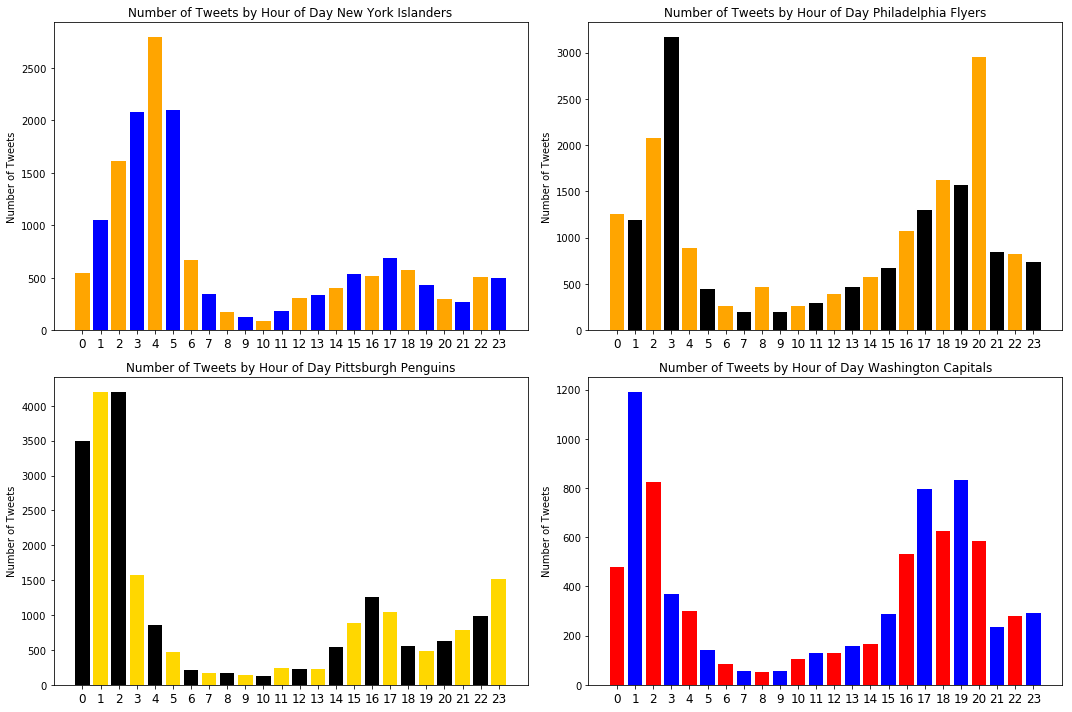

In [9]:
times_isles = isles_df.groupby('hour')['stop_text'].count()
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
plt.bar(np.arange(24), times_isles, color=['orange', 'blue'])
plt.xticks(np.arange(24),size='large')
plt.ylabel('Number of Tweets')
plt.title('Number of Tweets by Hour of Day New York Islanders')

times_flyers = flyers_df.groupby('hour')['stop_text'].count()
plt.subplot(2,2,2)
plt.bar(np.arange(24), times_flyers, color=['orange','black'])
plt.xticks(np.arange(24),size='large')
plt.ylabel('Number of Tweets')
plt.title('Number of Tweets by Hour of Day Philadelphia Flyers')

times_pens = pens_df.groupby('hour')['stop_text'].count()
plt.subplot(2,2,3)
plt.bar(np.arange(24), times_pens, color=['black','gold'])
plt.xticks(np.arange(24),size='large')
plt.ylabel('Number of Tweets')
plt.title('Number of Tweets by Hour of Day Pittsburgh Penguins')

times_caps = caps_df.groupby('hour')['stop_text'].count()
plt.subplot(2,2,4)
plt.bar(np.arange(24), times_caps, color=['red','blue'])
plt.xticks(np.arange(24),size='large')
plt.ylabel('Number of Tweets')
plt.title('Number of Tweets by Hour of Day Washington Capitals')

plt.tight_layout()
plt.show()

## Central Division - Tweets by Hour of Day

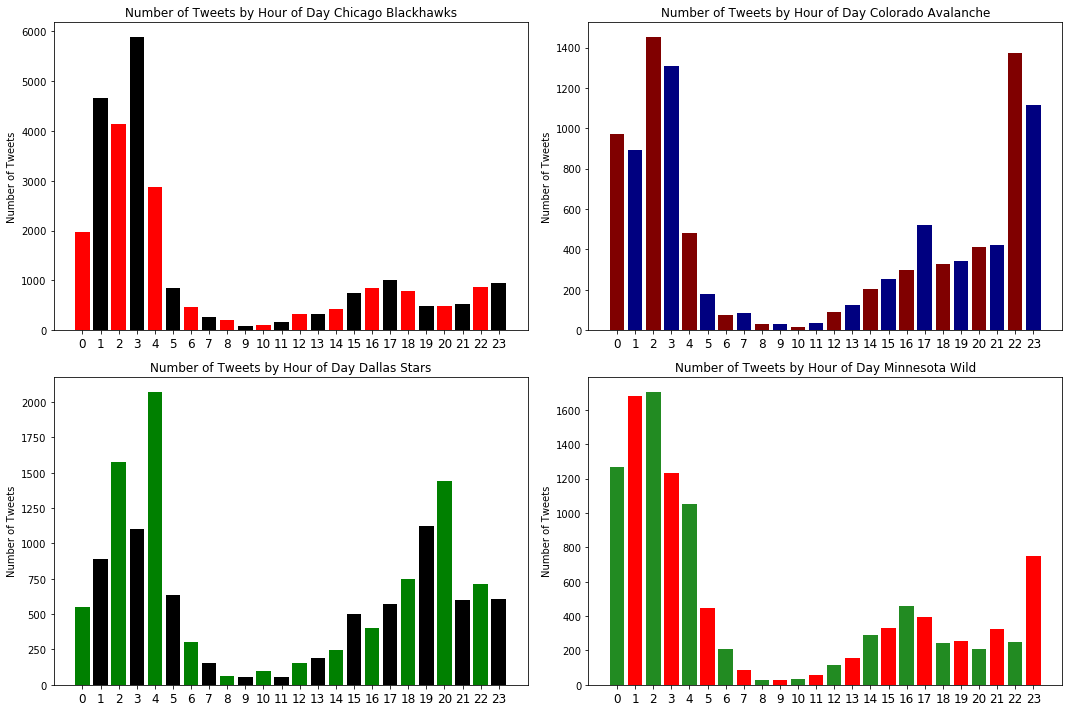

In [10]:
times_hawks = hawks_df.groupby('hour')['stop_text'].count()
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
plt.bar(np.arange(24), times_hawks, color=['red', 'black'])
plt.xticks(np.arange(24),size='large')
plt.ylabel('Number of Tweets')
plt.title('Number of Tweets by Hour of Day Chicago Blackhawks')

times_avs = avs_df.groupby('hour')['stop_text'].count()
plt.subplot(2,2,2)
plt.bar(np.arange(24), times_avs, color=['maroon','navy'])
plt.xticks(np.arange(24),size='large')
plt.ylabel('Number of Tweets')
plt.title('Number of Tweets by Hour of Day Colorado Avalanche')

times_stars = stars_df.groupby('hour')['stop_text'].count()
plt.subplot(2,2,3)
plt.bar(np.arange(24), times_stars, color=['green','black'])
plt.xticks(np.arange(24),size='large')
plt.ylabel('Number of Tweets')
plt.title('Number of Tweets by Hour of Day Dallas Stars')

times_wild = wild_df.groupby('hour')['stop_text'].count()
plt.subplot(2,2,4)
plt.bar(np.arange(24), times_wild, color=['forestgreen','red'])
plt.xticks(np.arange(24),size='large')
plt.ylabel('Number of Tweets')
plt.title('Number of Tweets by Hour of Day Minnesota Wild')

plt.tight_layout()
plt.show()

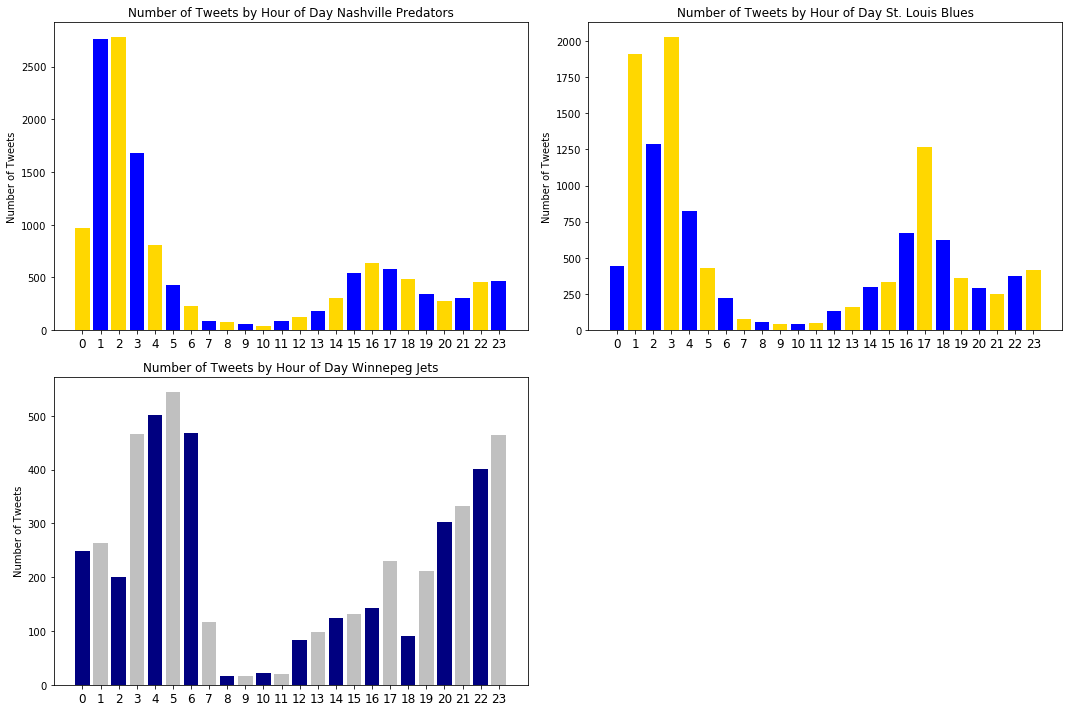

In [11]:
times_preds = preds_df.groupby('hour')['stop_text'].count()
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
plt.bar(np.arange(24), times_preds, color=['gold','blue'])
plt.xticks(np.arange(24),size='large')
plt.ylabel('Number of Tweets')
plt.title('Number of Tweets by Hour of Day Nashville Predators')

times_blues = blues_df.groupby('hour')['stop_text'].count()
plt.subplot(2,2,2)
plt.bar(np.arange(24), times_blues, color=['blue', 'gold'])
plt.xticks(np.arange(24),size='large')
plt.ylabel('Number of Tweets')
plt.title('Number of Tweets by Hour of Day St. Louis Blues')

times_jets = jets_df.groupby('hour')['stop_text'].count()
plt.subplot(2,2,3)
plt.bar(np.arange(24), times_jets, color=['navy','silver'])
plt.xticks(np.arange(24),size='large')
plt.ylabel('Number of Tweets')
plt.title('Number of Tweets by Hour of Day Winnepeg Jets')

plt.tight_layout()
plt.show()

# Frequency Counts for the NHL
In addition to the number of tweets, the most frequent words and bigrams were show for the NHL.

## Single Words
The bar plot below shows the most popular words in the entire list of tweets for the NHL. The most popular words are game, goal, win, and nhl, all of which are not surprising.

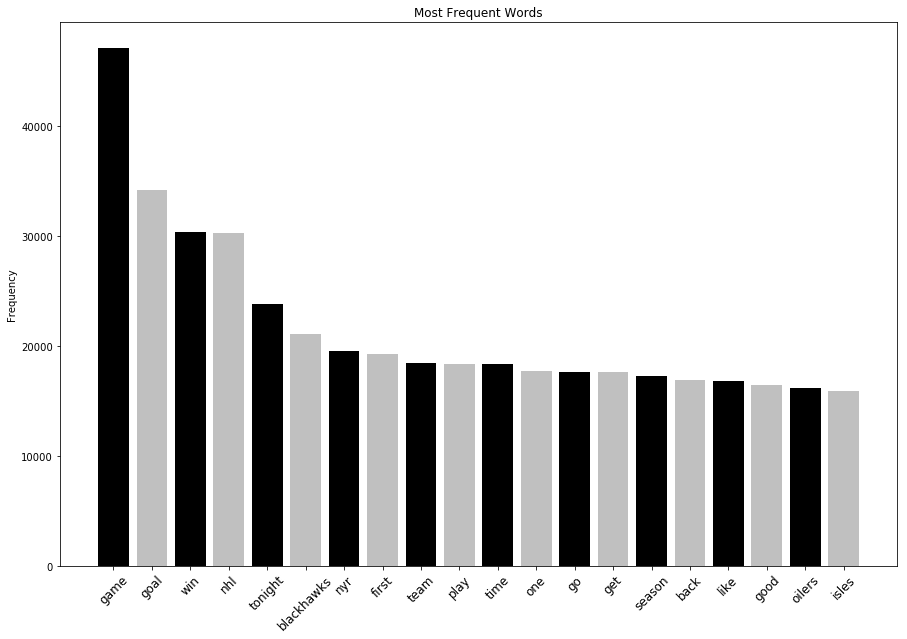

In [12]:
tweets = ' '.join(hockey['stop_text'])
tweets = tweets.replace('@', '')
tokens = nltk.tokenize.word_tokenize(tweets)
freq = FreqDist(tokens)
freq1 = freq.most_common(20)
word, count = zip(*freq1)
word = list(word)
count = list(count)

plt.figure(figsize=(15,10))
plt.bar(np.arange(len(word)), count, color=['black','silver'])
plt.xticks(np.arange(len(word)), word, rotation=45, size='large')
plt.ylabel('Frequency')
plt.title('Most Frequent Words')
plt.show()

## Bigrams
Bigrams are combinations of two consecutive words in a tweet. The bar plot shows the most popular bigrams in all of the tweets for the NHL. Power play is the most common bigram in the data, which is awarded when one team gets a penalty.

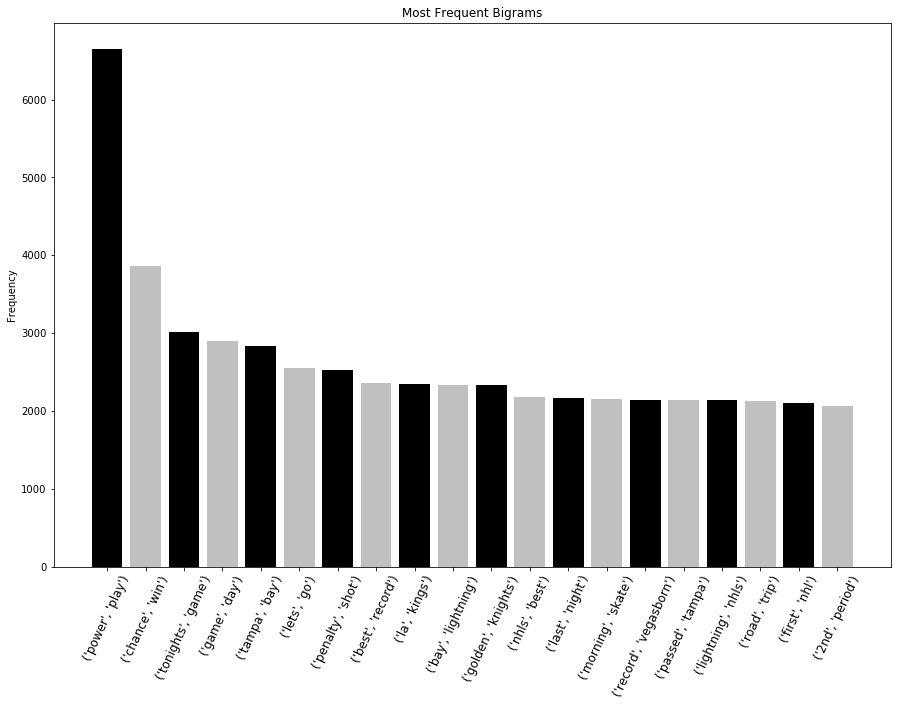

In [15]:
tokens2 = nltk.tokenize.word_tokenize(tweets)
bigrams = nltk.bigrams(tokens2)
bigram_freq = FreqDist(bigrams)
freq2 = bigram_freq.most_common(21)
bigram, bi_count = zip(*freq2)
bigram = list(bigram)
bi_count = list(bi_count)
bigram.remove(bigram[15])
bi_count.remove(bi_count[15])

plt.figure(figsize=(15,10))
plt.bar(np.arange(len(bigram)), bi_count, color=['black','silver'])
plt.xticks(np.arange(len(bigram)), bigram, rotation=65, size='large')
plt.ylabel('Frequency')
plt.title('Most Frequent Bigrams')
plt.show()

# Word Clouds
The word cloud below shows the most prominent words for the entire set of tweets for the NHL. The size of the word means that the word occurs more frequently than others.

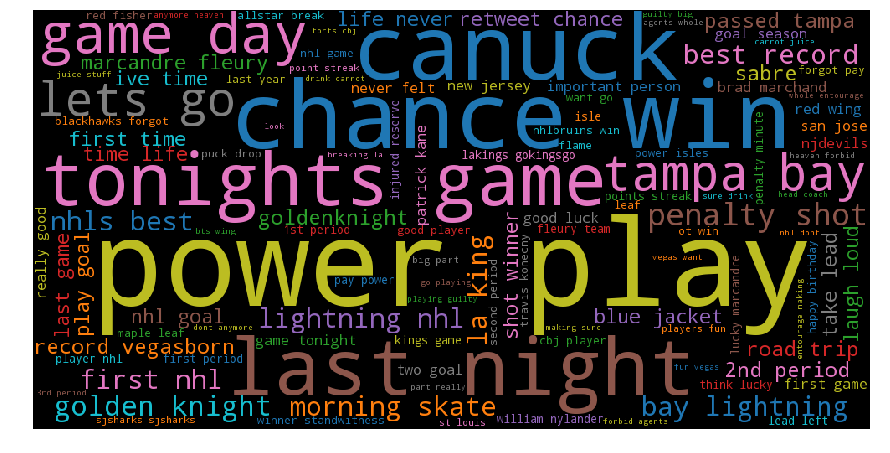

In [17]:
wordcloud = WordCloud(width = 1000, height = 500,colormap='tab10', min_font_size=10).generate(' '.join(hockey['stop_text']))
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

## Atlantic Division

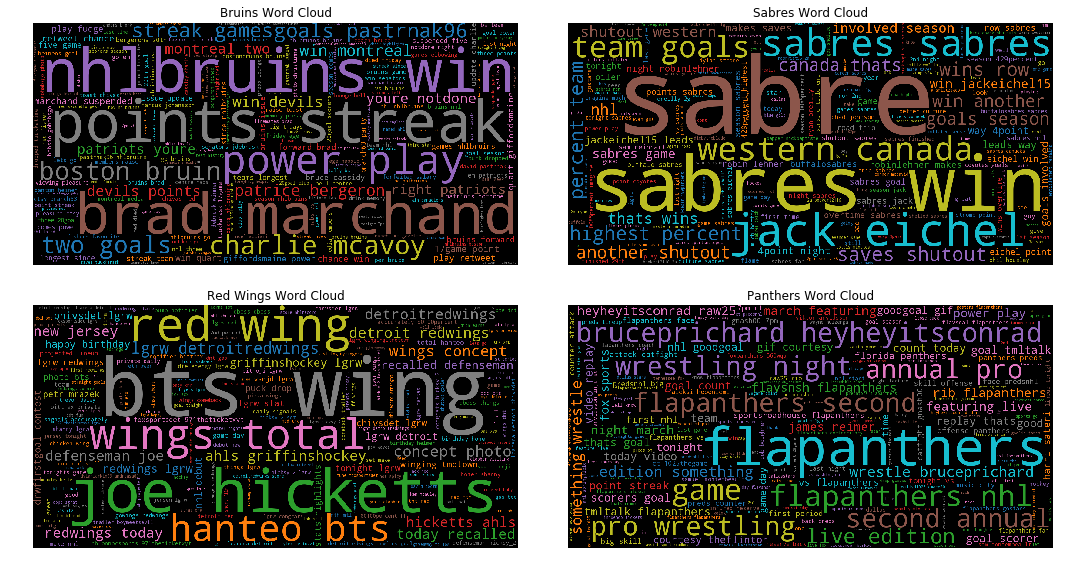

In [19]:
wordcloud = WordCloud(width = 1600, height = 800,colormap='tab10', min_font_size=10).generate(' '.join(bruins_df['stop_text']))
plt.figure(figsize=(15,8))
plt.subplot(2,2,1)
plt.imshow(wordcloud)
plt.axis("off")
plt.title('Bruins Word Cloud')

wordcloud = WordCloud(width = 1600, height = 800,colormap='tab10', min_font_size=10).generate(' '.join(sabres_df['stop_text']))
plt.subplot(2,2,2)
plt.imshow(wordcloud)
plt.axis("off")
plt.title('Sabres Word Cloud')

wordcloud = WordCloud(width = 1600, height = 800,colormap='tab10', min_font_size=10).generate(' '.join(wings_df['stop_text']))
plt.subplot(2,2,3)
plt.imshow(wordcloud)
plt.axis("off")
plt.title('Red Wings Word Cloud')

wordcloud = WordCloud(width = 1600, height = 800,colormap='tab10', min_font_size=10).generate(' '.join(panthers_df['stop_text']))
plt.subplot(2,2,4)
plt.imshow(wordcloud)
plt.axis("off")
plt.title('Panthers Word Cloud')

plt.tight_layout()
plt.show()

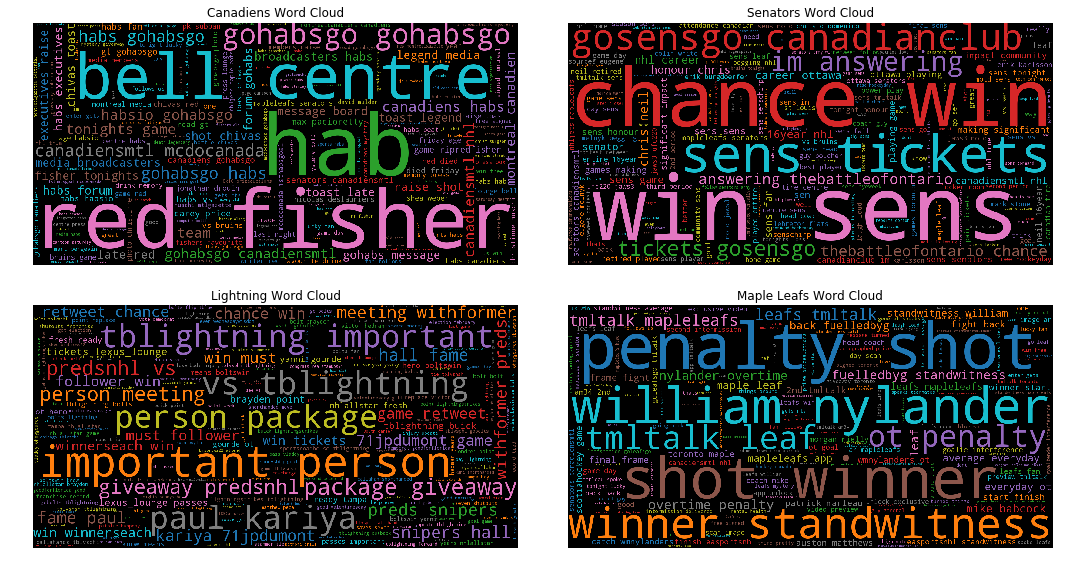

In [20]:
wordcloud = WordCloud(width = 1600, height = 800,colormap='tab10', min_font_size=10).generate(' '.join(habs_df['stop_text']))
plt.figure(figsize=(15,8))
plt.subplot(2,2,1)
plt.imshow(wordcloud)
plt.axis("off")
plt.title('Canadiens Word Cloud')

wordcloud = WordCloud(width = 1600, height = 800,colormap='tab10', min_font_size=10).generate(' '.join(sens_df['stop_text']))
plt.subplot(2,2,2)
plt.imshow(wordcloud)
plt.axis("off")
plt.title('Senators Word Cloud')

wordcloud = WordCloud(width = 1600, height = 800,colormap='tab10', min_font_size=10).generate(' '.join(bolts_df['stop_text']))
plt.subplot(2,2,3)
plt.imshow(wordcloud)
plt.axis("off")
plt.title('Lightning Word Cloud')

wordcloud = WordCloud(width = 1600, height = 800,colormap='tab10', min_font_size=10).generate(' '.join(leafs_df['stop_text']))
plt.subplot(2,2,4)
plt.imshow(wordcloud)
plt.axis("off")
plt.title('Maple Leafs Word Cloud')

plt.tight_layout()
plt.show()

## Pacific Division

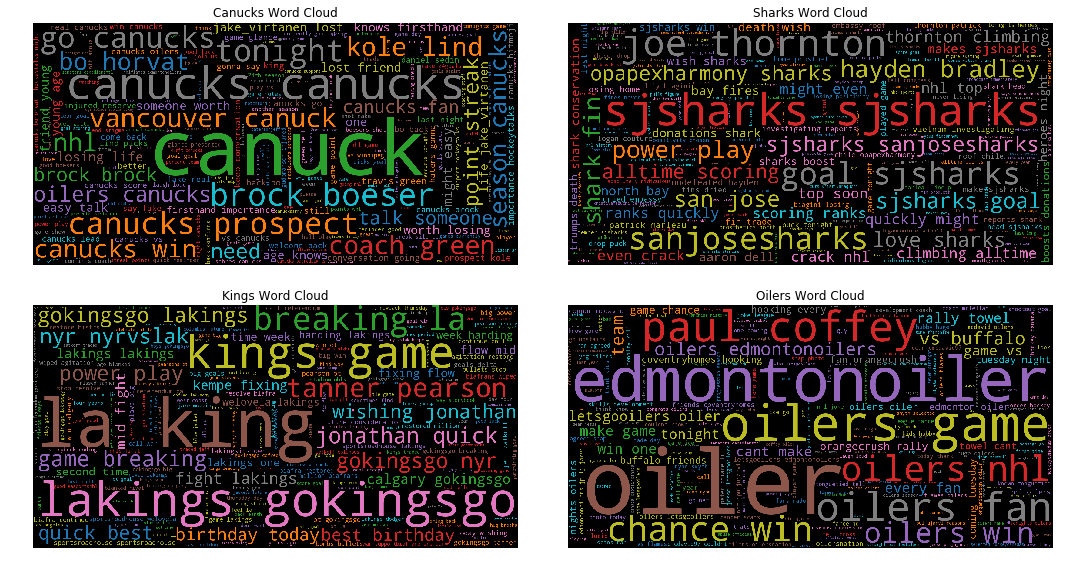

In [21]:
wordcloud = WordCloud(width = 1600, height = 800,colormap='tab10', min_font_size=10).generate(' '.join(canucks_df['stop_text']))
plt.figure(figsize=(15,8))
plt.subplot(2,2,1)
plt.imshow(wordcloud)
plt.axis("off")
plt.title('Canucks Word Cloud')

wordcloud = WordCloud(width = 1600, height = 800,colormap='tab10', min_font_size=10).generate(' '.join(sharks_df['stop_text']))
plt.subplot(2,2,2)
plt.imshow(wordcloud)
plt.axis("off")
plt.title('Sharks Word Cloud')

wordcloud = WordCloud(width = 1600, height = 800,colormap='tab10', min_font_size=10).generate(' '.join(kings_df['stop_text']))
plt.subplot(2,2,3)
plt.imshow(wordcloud)
plt.axis("off")
plt.title('Kings Word Cloud')

wordcloud = WordCloud(width = 1600, height = 800,colormap='tab10', min_font_size=10).generate(' '.join(oilers_df['stop_text']))
plt.subplot(2,2,4)
plt.imshow(wordcloud)
plt.axis("off")
plt.title('Oilers Word Cloud')

plt.tight_layout()
plt.show()

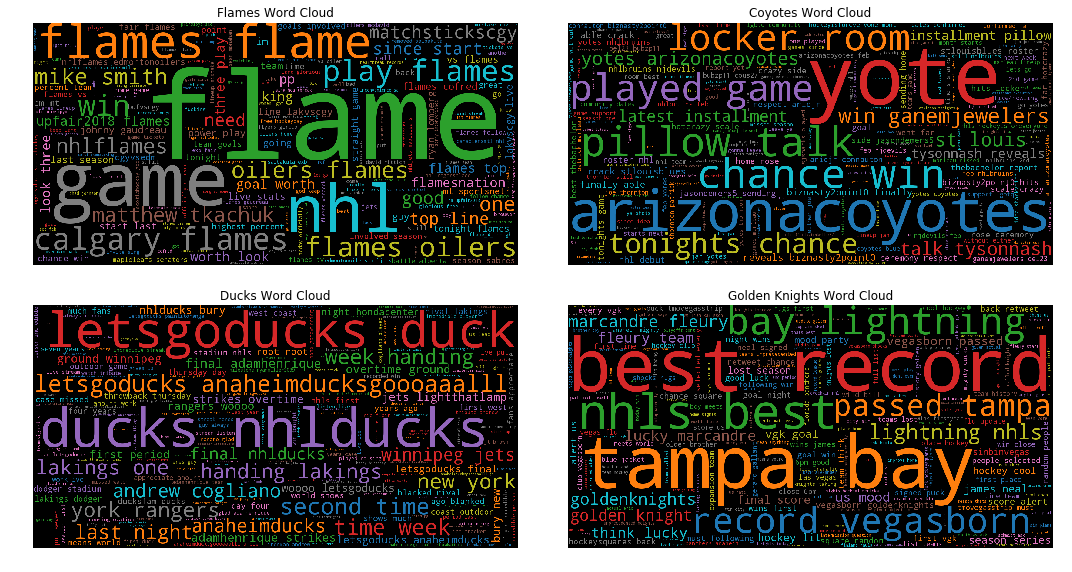

In [22]:
wordcloud = WordCloud(width = 1600, height = 800,colormap='tab10', min_font_size=10).generate(' '.join(flames_df['stop_text']))
plt.figure(figsize=(15,8))
plt.subplot(2,2,1)
plt.imshow(wordcloud)
plt.axis("off")
plt.title('Flames Word Cloud')

wordcloud = WordCloud(width = 1600, height = 800,colormap='tab10', min_font_size=10).generate(' '.join(yotes_df['stop_text']))
plt.subplot(2,2,2)
plt.imshow(wordcloud)
plt.axis("off")
plt.title('Coyotes Word Cloud')

wordcloud = WordCloud(width = 1600, height = 800,colormap='tab10', min_font_size=10).generate(' '.join(ducks_df['stop_text']))
plt.subplot(2,2,3)
plt.imshow(wordcloud)
plt.axis("off")
plt.title('Ducks Word Cloud')

wordcloud = WordCloud(width = 1600, height = 800,colormap='tab10', min_font_size=10).generate(' '.join(knights_df['stop_text']))
plt.subplot(2,2,4)
plt.imshow(wordcloud)
plt.axis("off")
plt.title('Golden Knights Word Cloud')

plt.tight_layout()
plt.show()

# Next Steps

The next steps for the project are included in the following list:
- Perform additional cleaning on the text
    - Look at removing mentions and hashtags
    - Correct more spelling errors
    - Replace more acronyms like team abbreviations (example: nyr is New York Rangers)
- Use PySpark for Sentiment Analysis for the full NHL and each team
- Use PySpark to tokenize the text
- Use the ML package in PySpark to perform the sentiment analysis
- Use the full NHL tweets to do sentiment analysis using a word2vec algorithm
